# **EDA (Exploratory Data Analysis)** - Churn Prediction


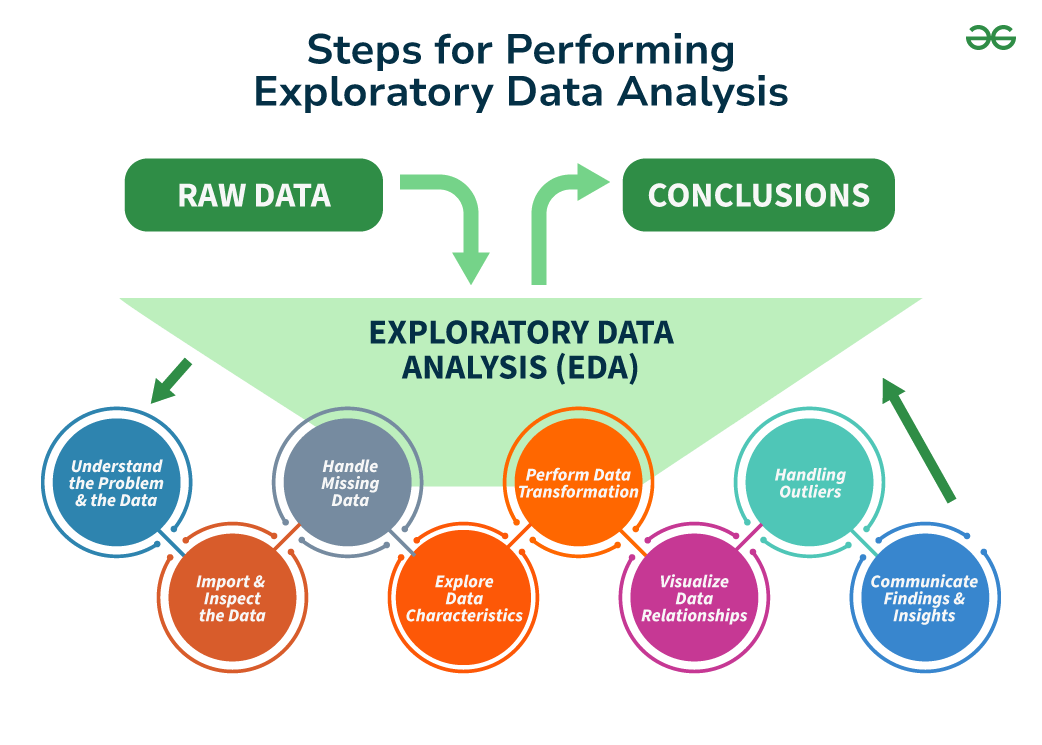

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Overview:**

In [ ]:
path="/content/drive/MyDrive/Mlops/telco.csv"
df= pd.read_csv(path)
df.head()

Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                       390.80        1024.10   
2                        0                       203.94        1910.88   
3                        0                       494.00        2995.07   
4                        0                       234.21        3102.36   

   Satisfaction Score  Customer Status Churn Label Churn Score  CLTV  \
0                   3          Churned         Yes          91  5433   
1                   3          Churned         Yes          69  5302   
2                   2          Churned         Yes          81  3179   
3                   2          Churned         Yes          88  5337   
4                   2          Churned         Yes          67  2793   

    Churn Category                  Churn Reason  
0       Competitor  Competitor offered more data  
1       Competitor  Competitor made better offer  
2       Competitor  Competitor made better offer  
3  Dissatisfaction     Limited range of services  
4            Price            Extra data charges  

[5 rows x 50 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [ ]:
results = []
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    column_type = df[column].dtype

    results.append({
        "Feature": column,
        "Type": column_type,
        "Number of Unique Values": num_unique_values,
        "Unique Values": unique_values
    })
results_df = pd.DataFrame(results)

results_df

Feature     Type  Number of Unique Values  \
0                         Customer ID   object                     7043   
1                              Gender   object                        2   
2                                 Age    int64                       62   
3                            Under 30   object                        2   
4                      Senior Citizen   object                        2   
5                             Married   object                        2   
6                          Dependents   object                        2   
7                Number of Dependents    int64                       10   
8                             Country   object                        1   
9                               State   object                        1   
10                               City   object                     1106   
11                           Zip Code    int64                     1626   
12                           Latitude  float64                     1626   
13                          Longitude  float64                     1625   
14                         Population    int64                     1569   
15                            Quarter   object                        1   
16                  Referred a Friend   object                        2   
17                Number of Referrals    int64                       12   
18                   Tenure in Months    int64                       72   
19                              Offer   object                        6   
20                      Phone Service   object                        2   
21  Avg Monthly Long Distance Charges  float64                     3584   
22                     Multiple Lines   object                        2   
23                   Internet Service   object                        2   
24                      Internet Type   object                        4   
25            Avg Monthly GB Download    int64                       50   
26                    Online Security   object                        2   
27                      Online Backup   object                        2   
28             Device Protection Plan   object                        2   
29               Premium Tech Support   object                        2   
30                       Streaming TV   object                        2   
31                   Streaming Movies   object                        2   
32                    Streaming Music   object                        2   
33                     Unlimited Data   object                        2   
34                           Contract   object                        3   
35                  Paperless Billing   object                        2   
36                     Payment Method   object                        3   
37                     Monthly Charge  float64                     1585   
38                      Total Charges  float64                     6540   
39                      Total Refunds  float64                      500   
40           Total Extra Data Charges    int64                       16   
41        Total Long Distance Charges  float64                     6087   
42                      Total Revenue  float64                     6982   
43                 Satisfaction Score    int64                        5   
44                    Customer Status   object                        3   
45                        Churn Label   object                        2   
46                        Churn Score    int64                       81   
47                               CLTV    int64                     3438   
48                     Churn Category   object                        6   
49                       Churn Reason   object                       21   

                                                                                          Unique Values  
0   [8779-QRDMV, 7495-OOKFY, 1658-BYGOY, 4598-XLKNJ, 4846-WHAFZ, 4412-YLTKF, 0390-DCFDQ, 3445-HXXG

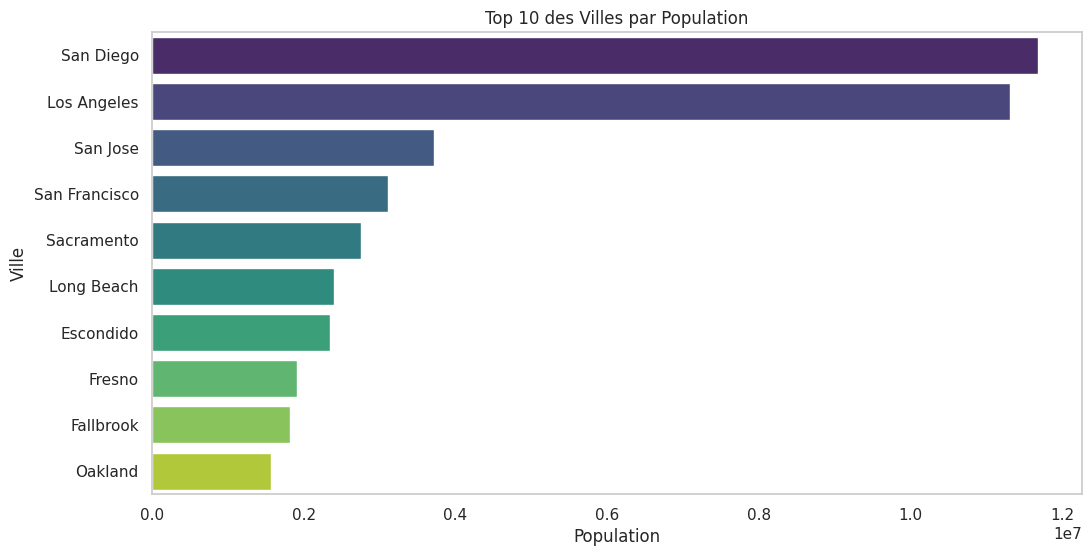

In [ ]:
# Créer un tableau résumé avec la population par ville
population_by_city = df.groupby('City')['Population'].sum().reset_index()
# Trier par population descendante
population_by_city = population_by_city.sort_values(by='Population', ascending=False)


# Créer un graphique à barres pour visualiser la population par ville
plt.figure(figsize=(12, 6))
sns.barplot(data=population_by_city.head(10), x='Population', y='City', palette='viridis')
plt.title('Top 10 des Villes par Population')
plt.xlabel('Population')
plt.ylabel('Ville')
plt.grid(axis='x')
plt.show()

1. **Customer Information:**
* Customer ID
* Gender: Male or Female.
* Age: The age of the customer.
* Under 30: Whether the customer is under 30 years old (binary).
* Senior Citizen: Whether the customer is a senior citizen (binary).
* Married: Marital status of the customer.
* Dependents: Whether the customer has dependents (binary).
* Number of Dependents: The number of dependents.

2. **Geographical Information:**
* Country: The country where the customer resides.
* State: The state of the customer’s residence.
* City: The city of the customer’s residence.
* Zip Code: The postal code of the customer’s residence.
* Latitude: The latitude coordinates of the customer’s location.
* Longitude: The longitude coordinates of the customer’s location.
* Population: Population of the city where the customer resides.

3. **Service Information:**
* Phone Service: Whether the customer has phone service (binary).
* Multiple Lines: Whether the customer has multiple lines (binary).
* Internet Service: Whether the customer has internet service (binary).
* Internet Type: The type of internet service the customer has.
* Avg Monthly Long Distance Charges: The average monthly charges for long-distance calls.
* Avg Monthly GB Download: Average GB downloaded per month.
* Online Security: Whether the customer has online security services.
* Online Backup: Whether the customer has online backup services.
* Device Protection Plan: Whether the customer has device protection.
* Premium Tech Support: Whether the customer has premium tech support.
* Streaming TV: Whether the customer has a streaming TV subscription.
* Streaming Movies: Whether the customer has a streaming movie subscription.
* Streaming Music: Whether the customer has a streaming music subscription.
* Unlimited Data: Whether the customer has unlimited data services.

4. **Account Information:**
* Tenure in Months: How long the customer has been with the company (in months).
* Offer: Any offers or promotions the customer has taken.
* Contract: The type of contract the customer has (e.g., month-to-month, one-year).
* Paperless Billing: Whether the customer is on paperless billing.
* Payment Method: The method of payment used by the customer (e.g., credit card, bank transfer).
* Monthly Charge: The customer’s monthly charge.
* Total Charges: Total amount billed to the customer.
* Total Refunds: Any refunds the customer has received.
* Total Extra Data Charges: Any extra charges for data overages.
* Total Long Distance Charges: Total charges for long-distance calls.
* Total Revenue: The total revenue generated by the customer.

5. **Customer Satisfaction and Churn Information:**
* Satisfaction Score: The customer’s satisfaction score.
* Customer Status: The status of the customer (active or inactive).
* Churn Label: Whether the customer has churned (left the service).
* Churn Score: A score indicating the likelihood of churn.
* CLTV: Customer Lifetime Value.
* Churn Category: The category of churn (e.g., voluntary, involuntary).
* Churn Reason: The reason why the customer churned.

6. **Referrals and Recommendations:**
* Referred a Friend: Whether the customer has referred a friend (binary).
* Number of Referrals: The number of friends referred by the customer.

7. **Time-Related Information:**
* Quarter: The quarter in which the data was recorded or the customer joined.

## **Missing values**


In [ ]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

Churn Category    73.463013
Churn Reason      73.463013
Offer             55.047565
Internet Type     21.666903
dtype: float64


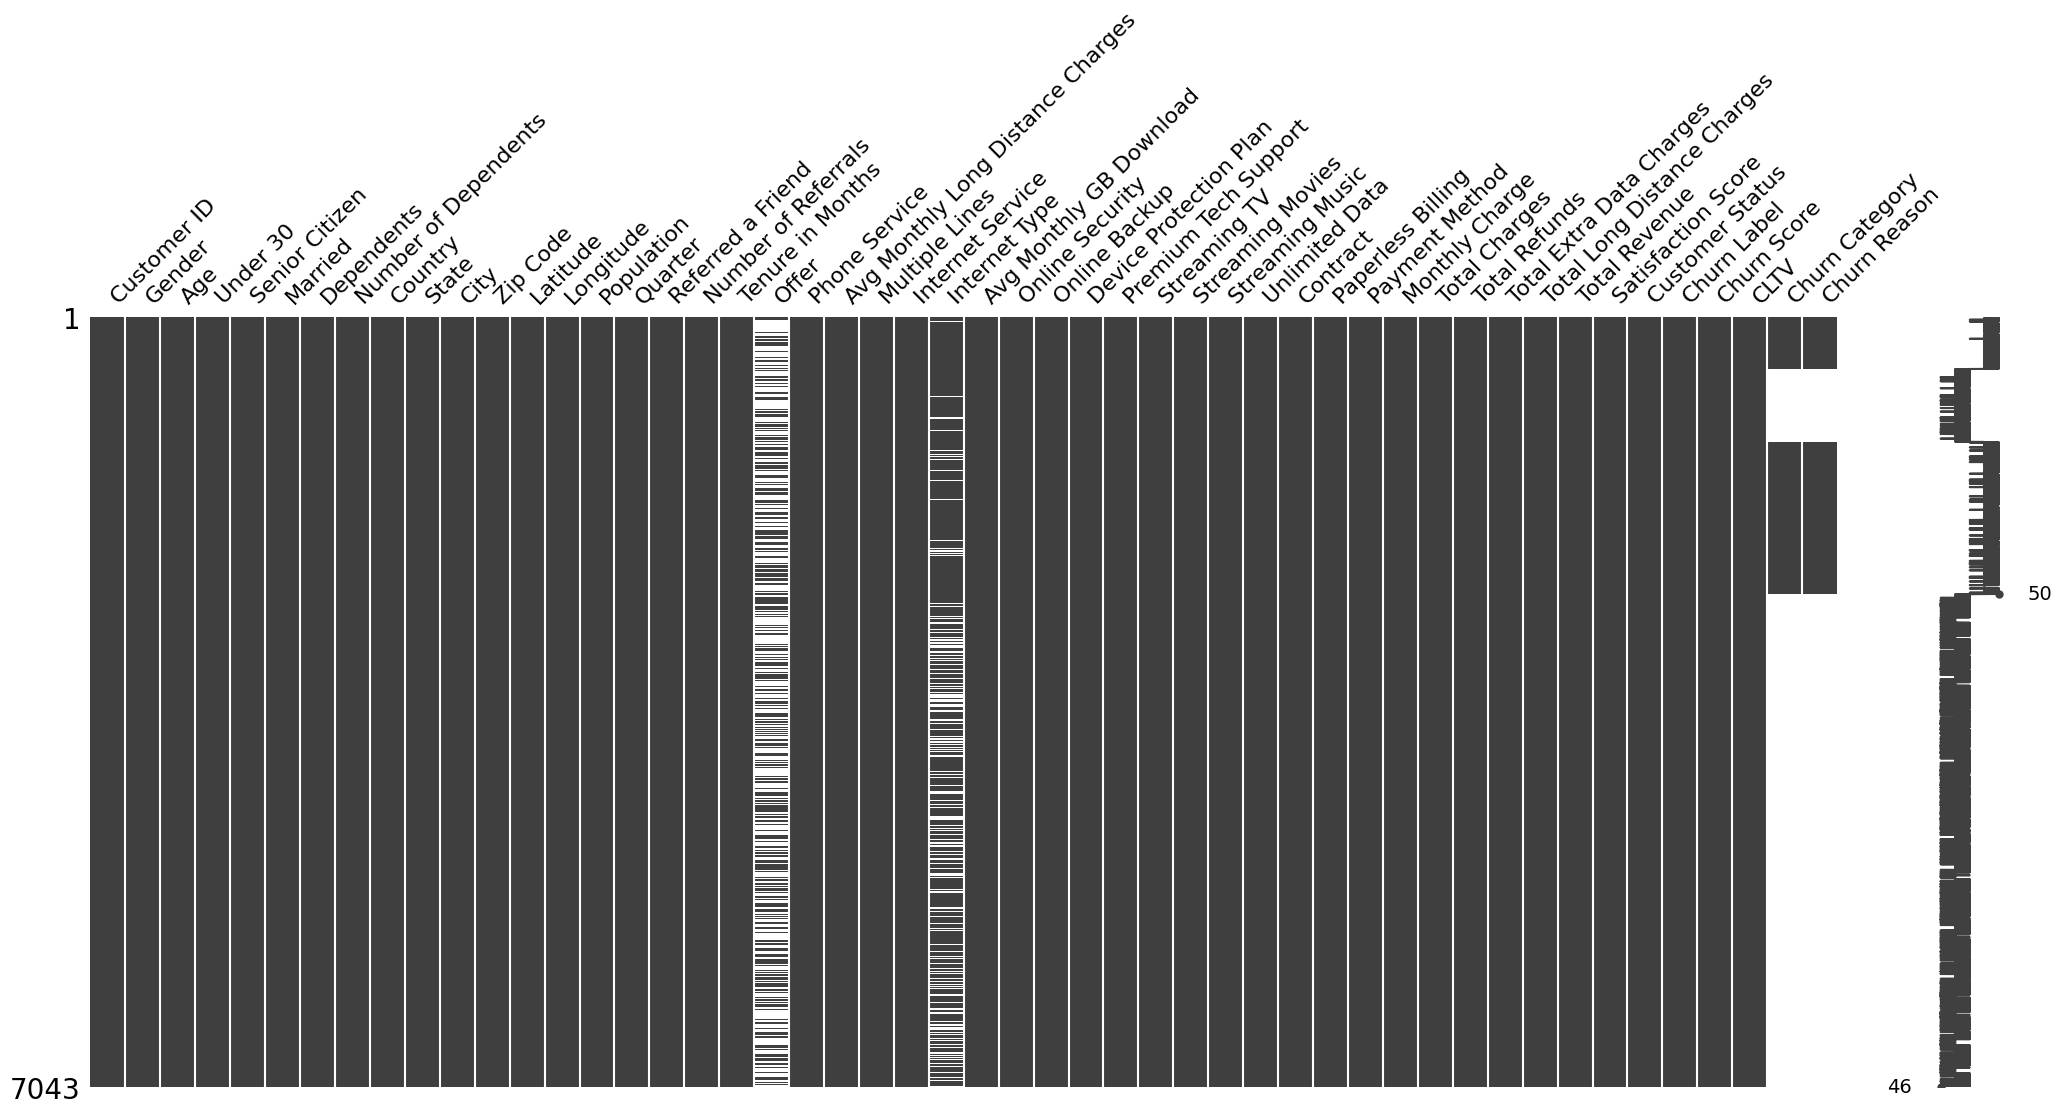

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

➡The *Churn Category* and *Churn Reason* columns, with 73.46% missing values, only apply to churned customers. We'll remove them as they are irrelevant for active customers.

➡For the *Offer* and *Internet Type* columns, we will perform imputation to handle the missing values, ensuring that these features remain usable for all customers.

## **Duplicate rows :**

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


##**Exploring Feature Distributions:**

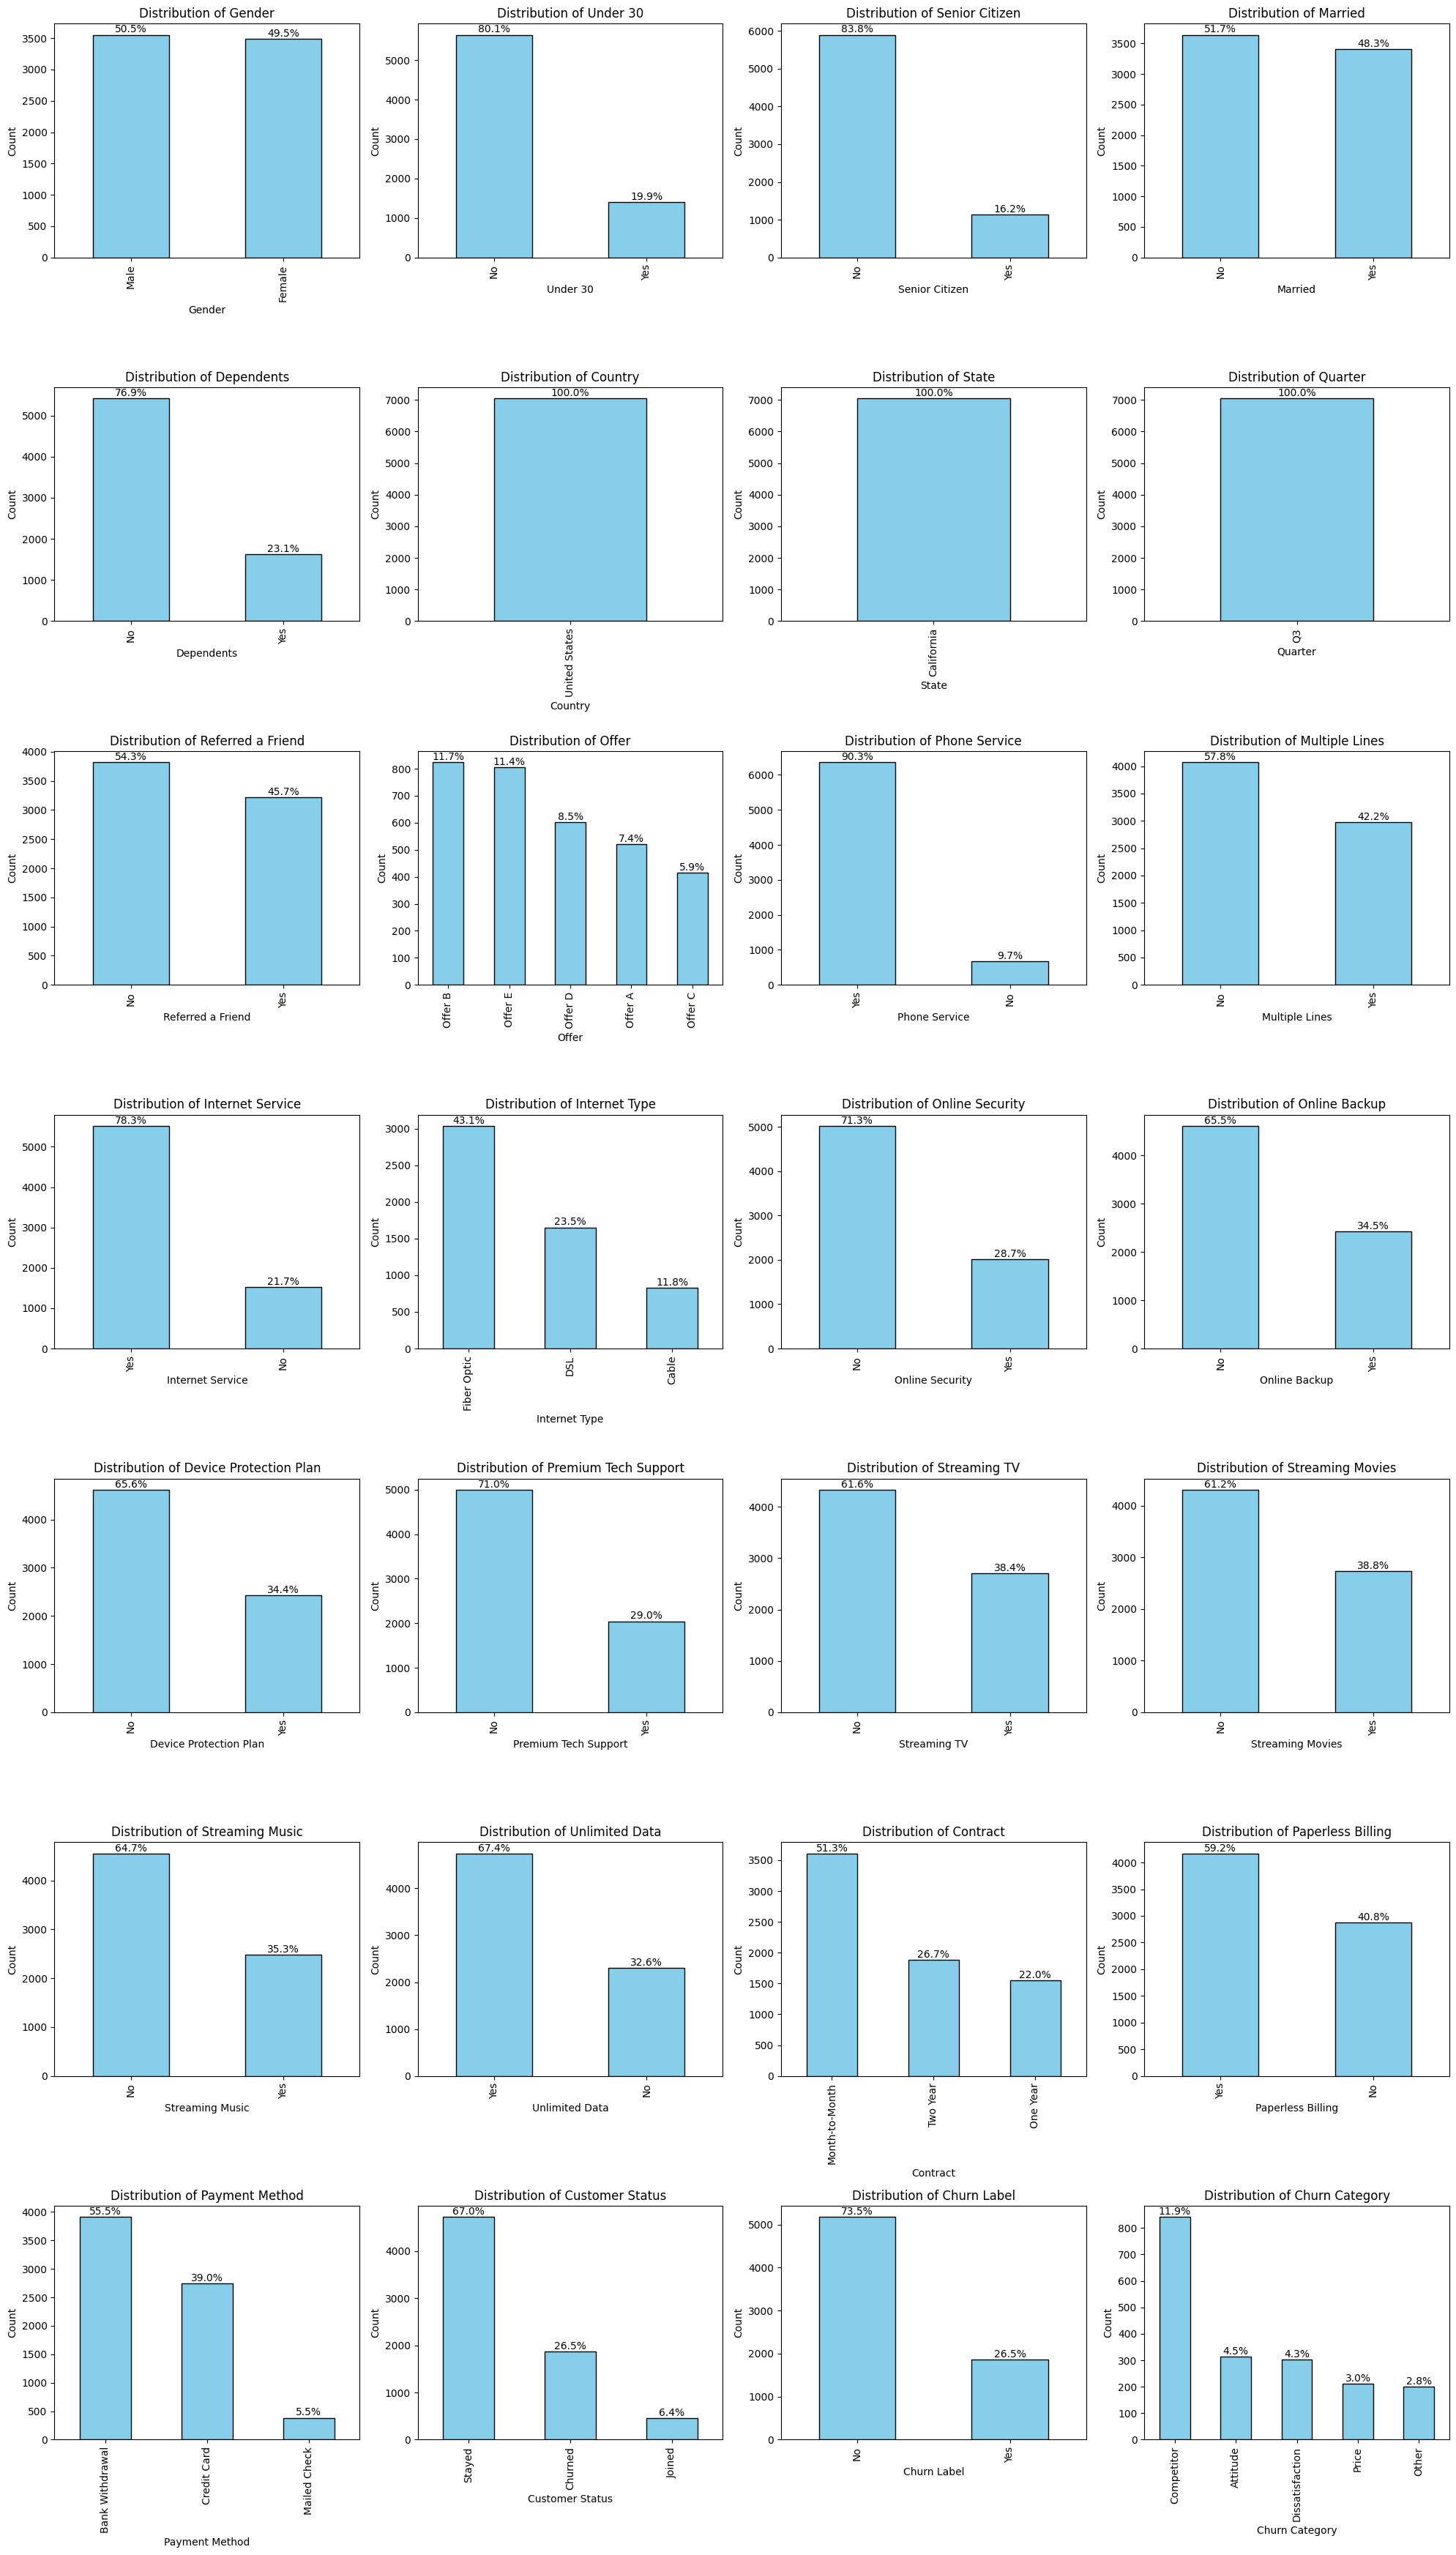

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns = categorical_columns.drop(['Customer ID', 'City', 'Churn Reason'])

num_columns = 4
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axs = axs.flatten()

for i, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    total = len(df[column])
    percentages = (value_counts / total) * 100  # Calculer les pourcentages

    value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=axs[i])

    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

    for j, v in enumerate(value_counts):
        axs[i].text(j, v + 1, f'{percentages[j]:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

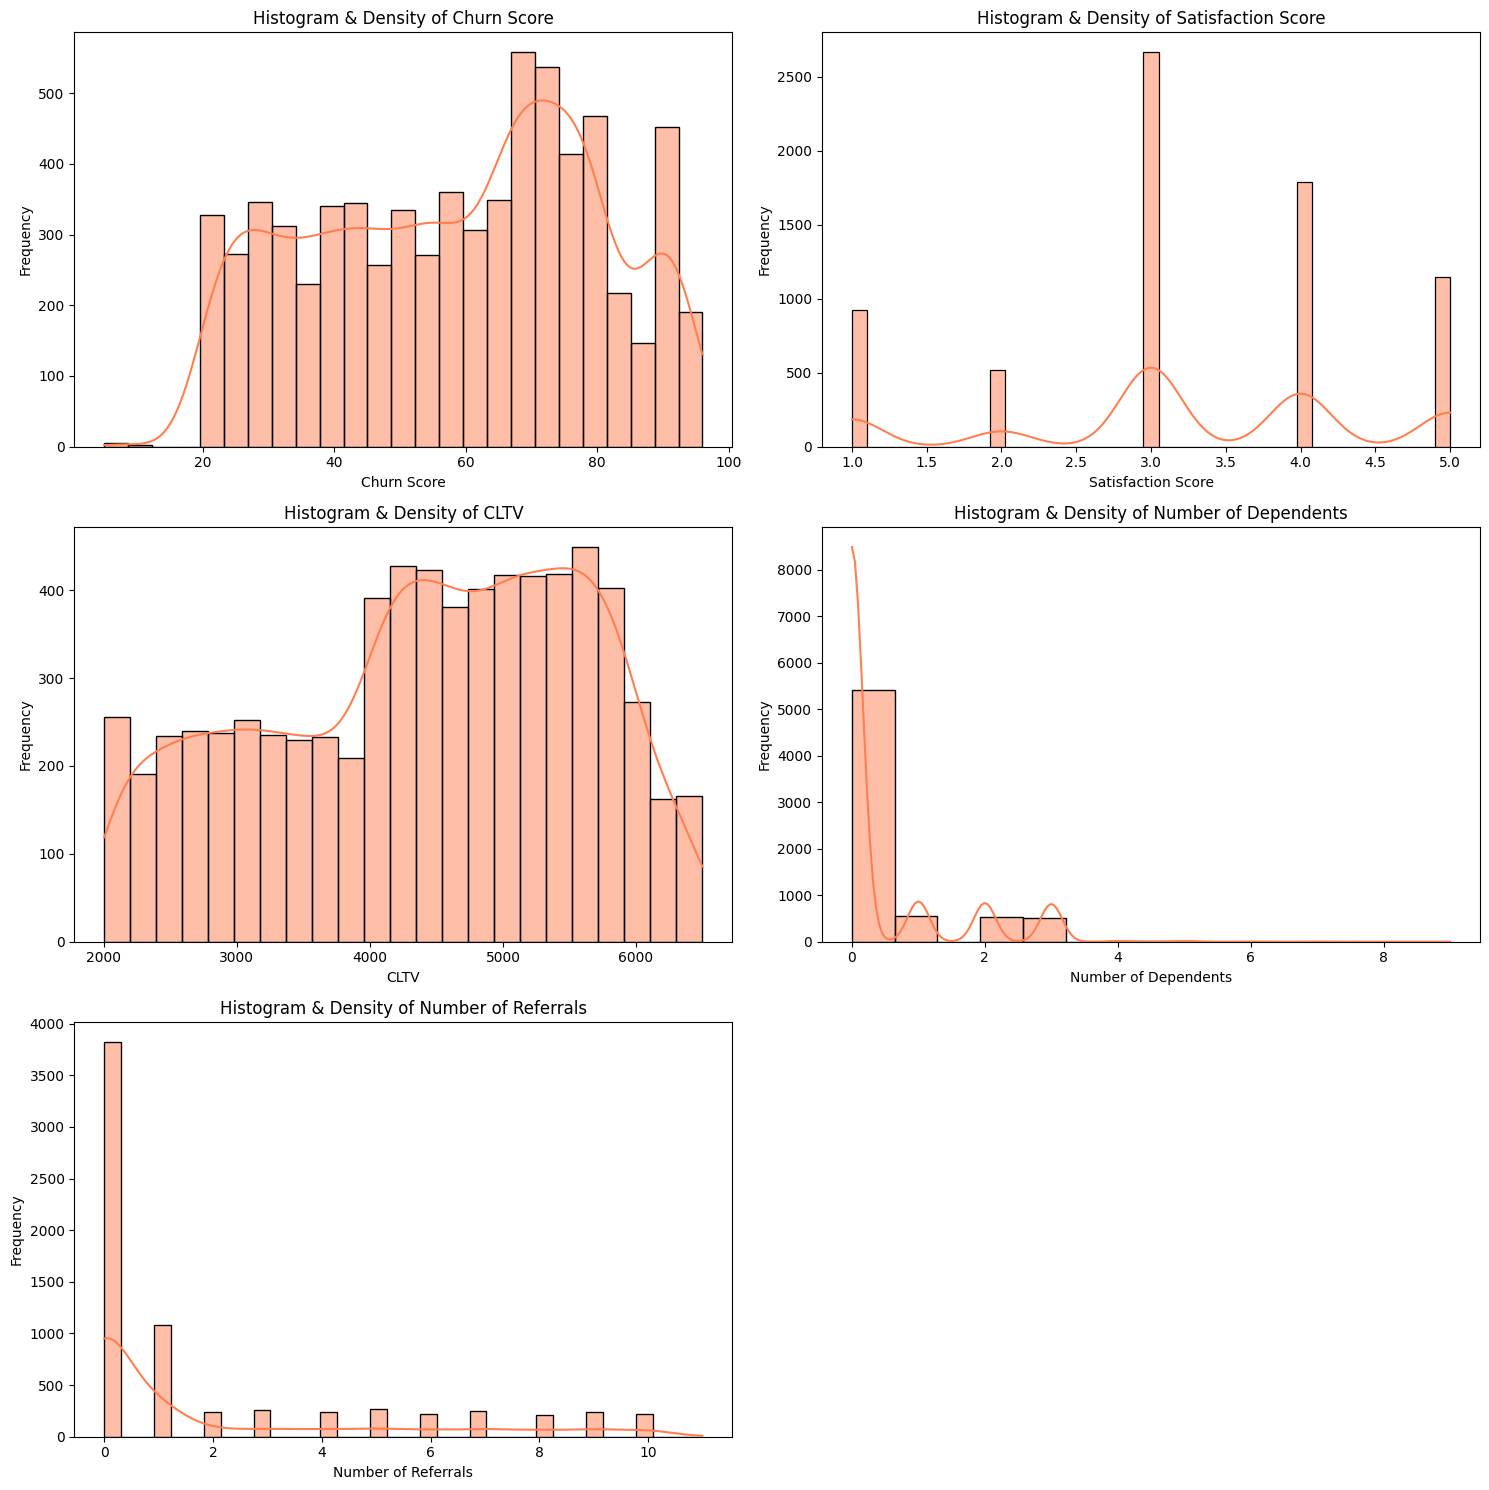

In [ ]:
features_to_plot = ['Churn Score', 'Satisfaction Score', 'CLTV', 'Number of Dependents', 'Number of Referrals']

num_rows = (len(features_to_plot) + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, 2)
    sns.histplot(df[feature], kde=True, color='coral', edgecolor='black', ax=axs[row, col])
    axs[row, col].set_title(f'Histogram & Density of {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Frequency')

if len(features_to_plot) % 2 != 0:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.show()

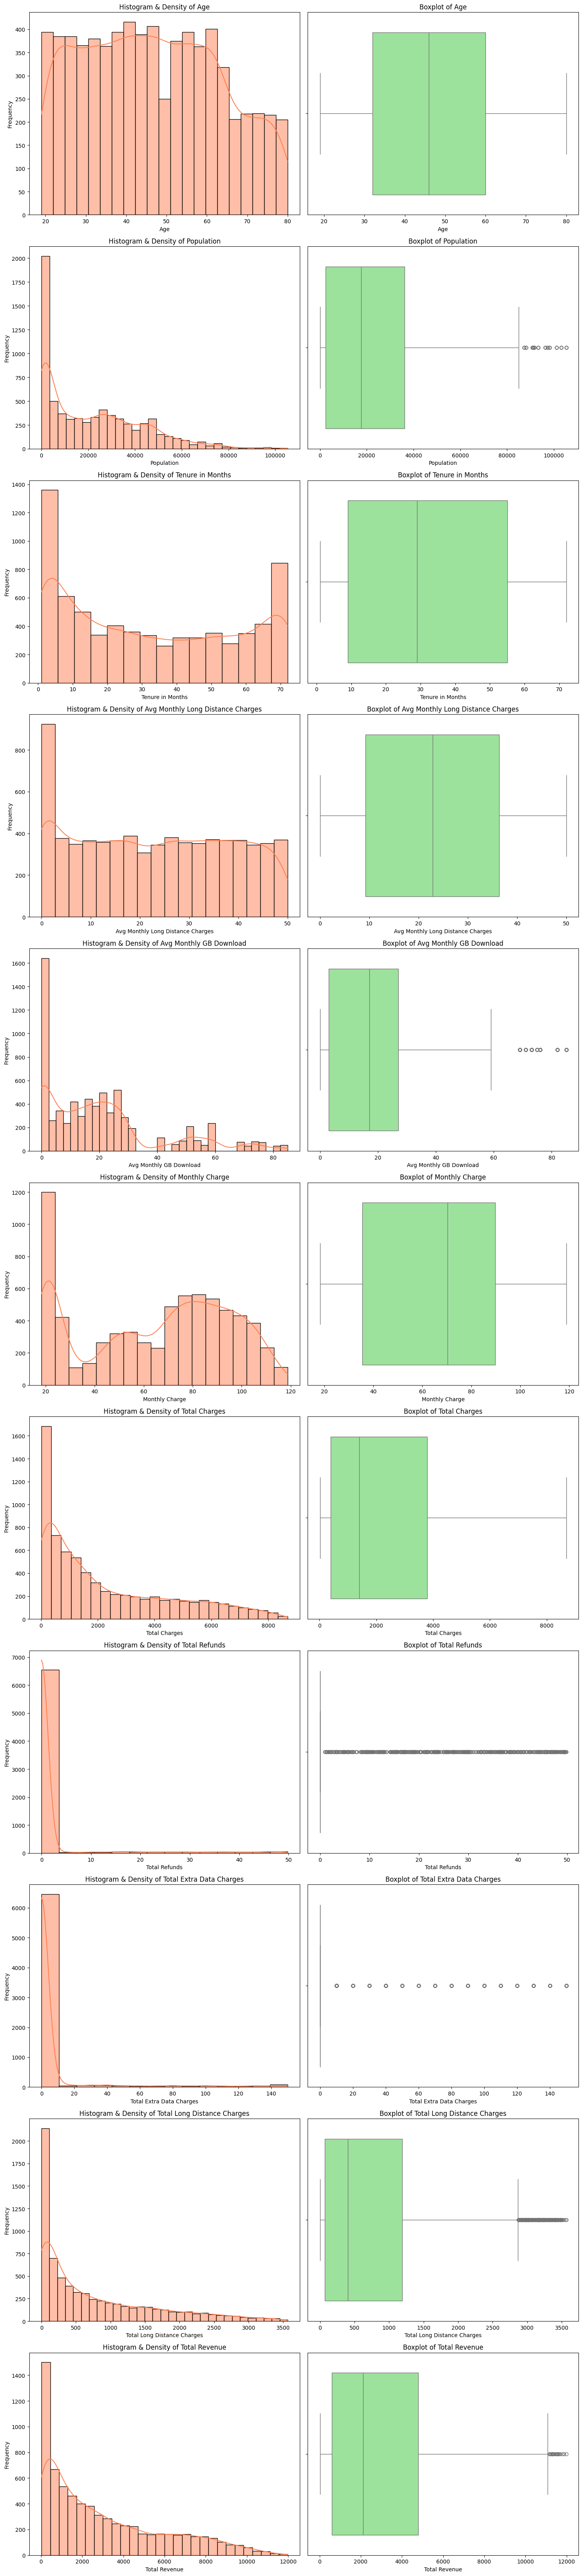

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns=numerical_columns.drop(["Longitude","Latitude","Zip Code"])
numerical_columns=numerical_columns.drop(features_to_plot)

num_columns = 2
num_rows = len(numerical_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 6))
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, color='coral', ax=axs[i, 0], edgecolor='black')
    axs[i, 0].set_title(f'Histogram & Density of {column}')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Frequency')

    sns.boxplot(x=df[column], ax=axs[i, 1], color='lightgreen')
    axs[i, 1].set_title(f'Boxplot of {column}')
    axs[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

##**Relationships Between Features:**

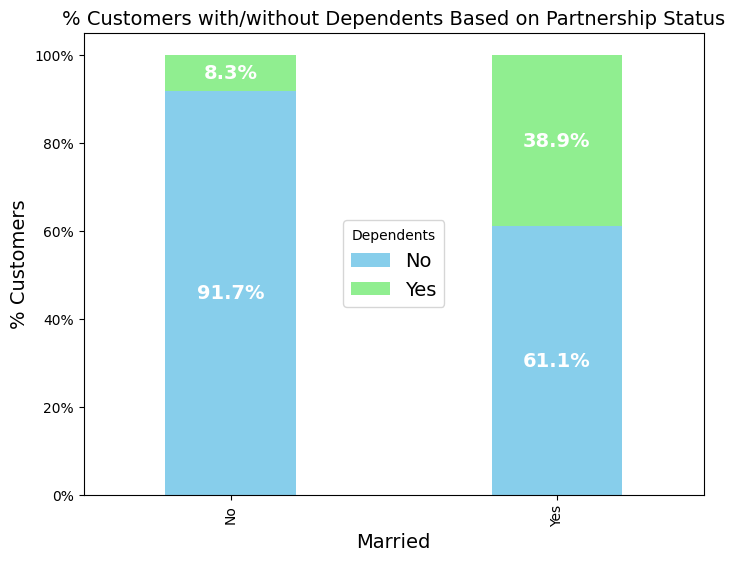

In [ ]:
colors = ['skyblue', 'lightgreen']
partner_dependents = df.groupby(['Married', 'Dependents']).size().unstack()
percentage_data = (partner_dependents.T * 100.0 / partner_dependents.T.sum()).T

fig, ax = plt.subplots(figsize=(8, 6))
percentage_data.plot(kind='bar', width=0.4, stacked=True, ax=ax, color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Dependents', fontsize=14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without Dependents Based on Partnership Status', size=14)
ax.xaxis.label.set_size(14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', color='white', weight='bold', size=14)
plt.show()

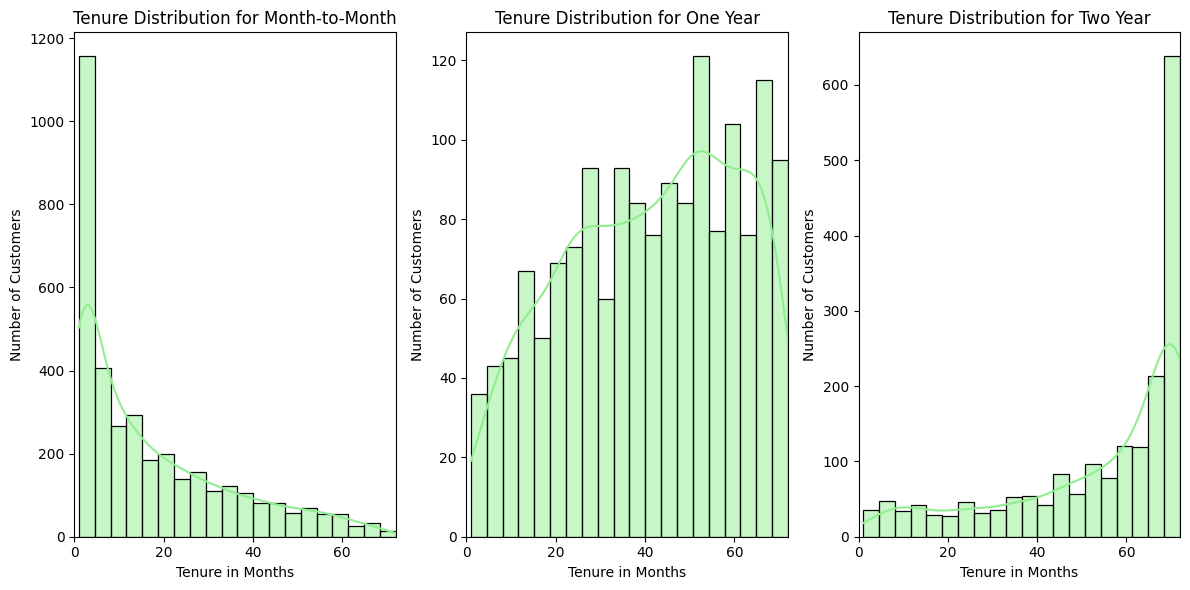

In [ ]:
contract_types = df['Contract'].unique()
num_contracts = len(contract_types)
plt.figure(figsize=(12, 6))

for i, contract in enumerate(contract_types):
    plt.subplot(1, num_contracts, i + 1)  # Create subplots
    sns.histplot(data=df[df['Contract'] == contract],
                 x='Tenure in Months', bins=20, color='lightgreen', kde=True)
    plt.title(f'Tenure Distribution for {contract}')
    plt.xlabel('Tenure in Months')
    plt.ylabel('Number of Customers')
    plt.xlim(0, df['Tenure in Months'].max())

plt.tight_layout()
plt.show()

Coefficient de corrélation entre Montant Mensuel et Total Charges: 0.65


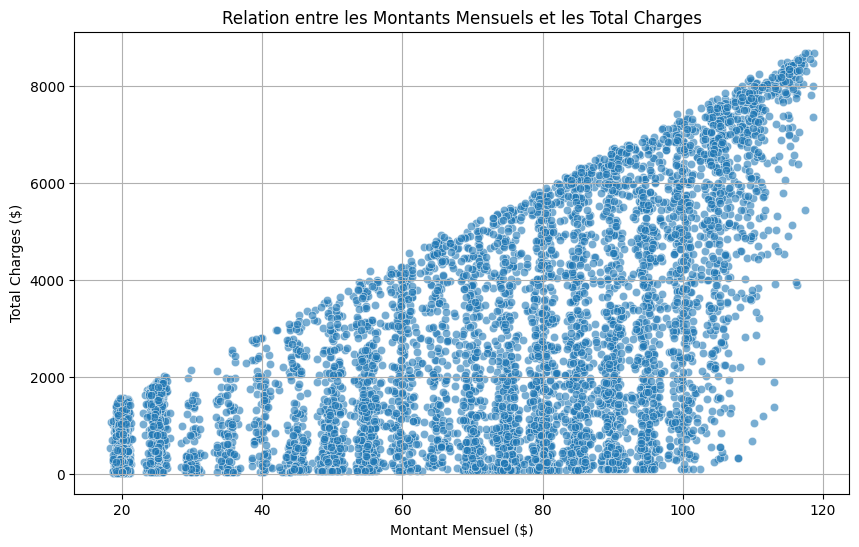

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Monthly Charge', y='Total Charges', alpha=0.6)
plt.title('Relation entre les Montants Mensuels et les Total Charges')
plt.xlabel('Montant Mensuel ($)')
plt.ylabel('Total Charges ($)')
plt.grid(True)

# Calculer le coefficient de corrélation
correlation = df['Monthly Charge'].corr(df['Total Charges'])

print(f'Coefficient de corrélation entre Montant Mensuel et Total Charges: {correlation:.2f}')

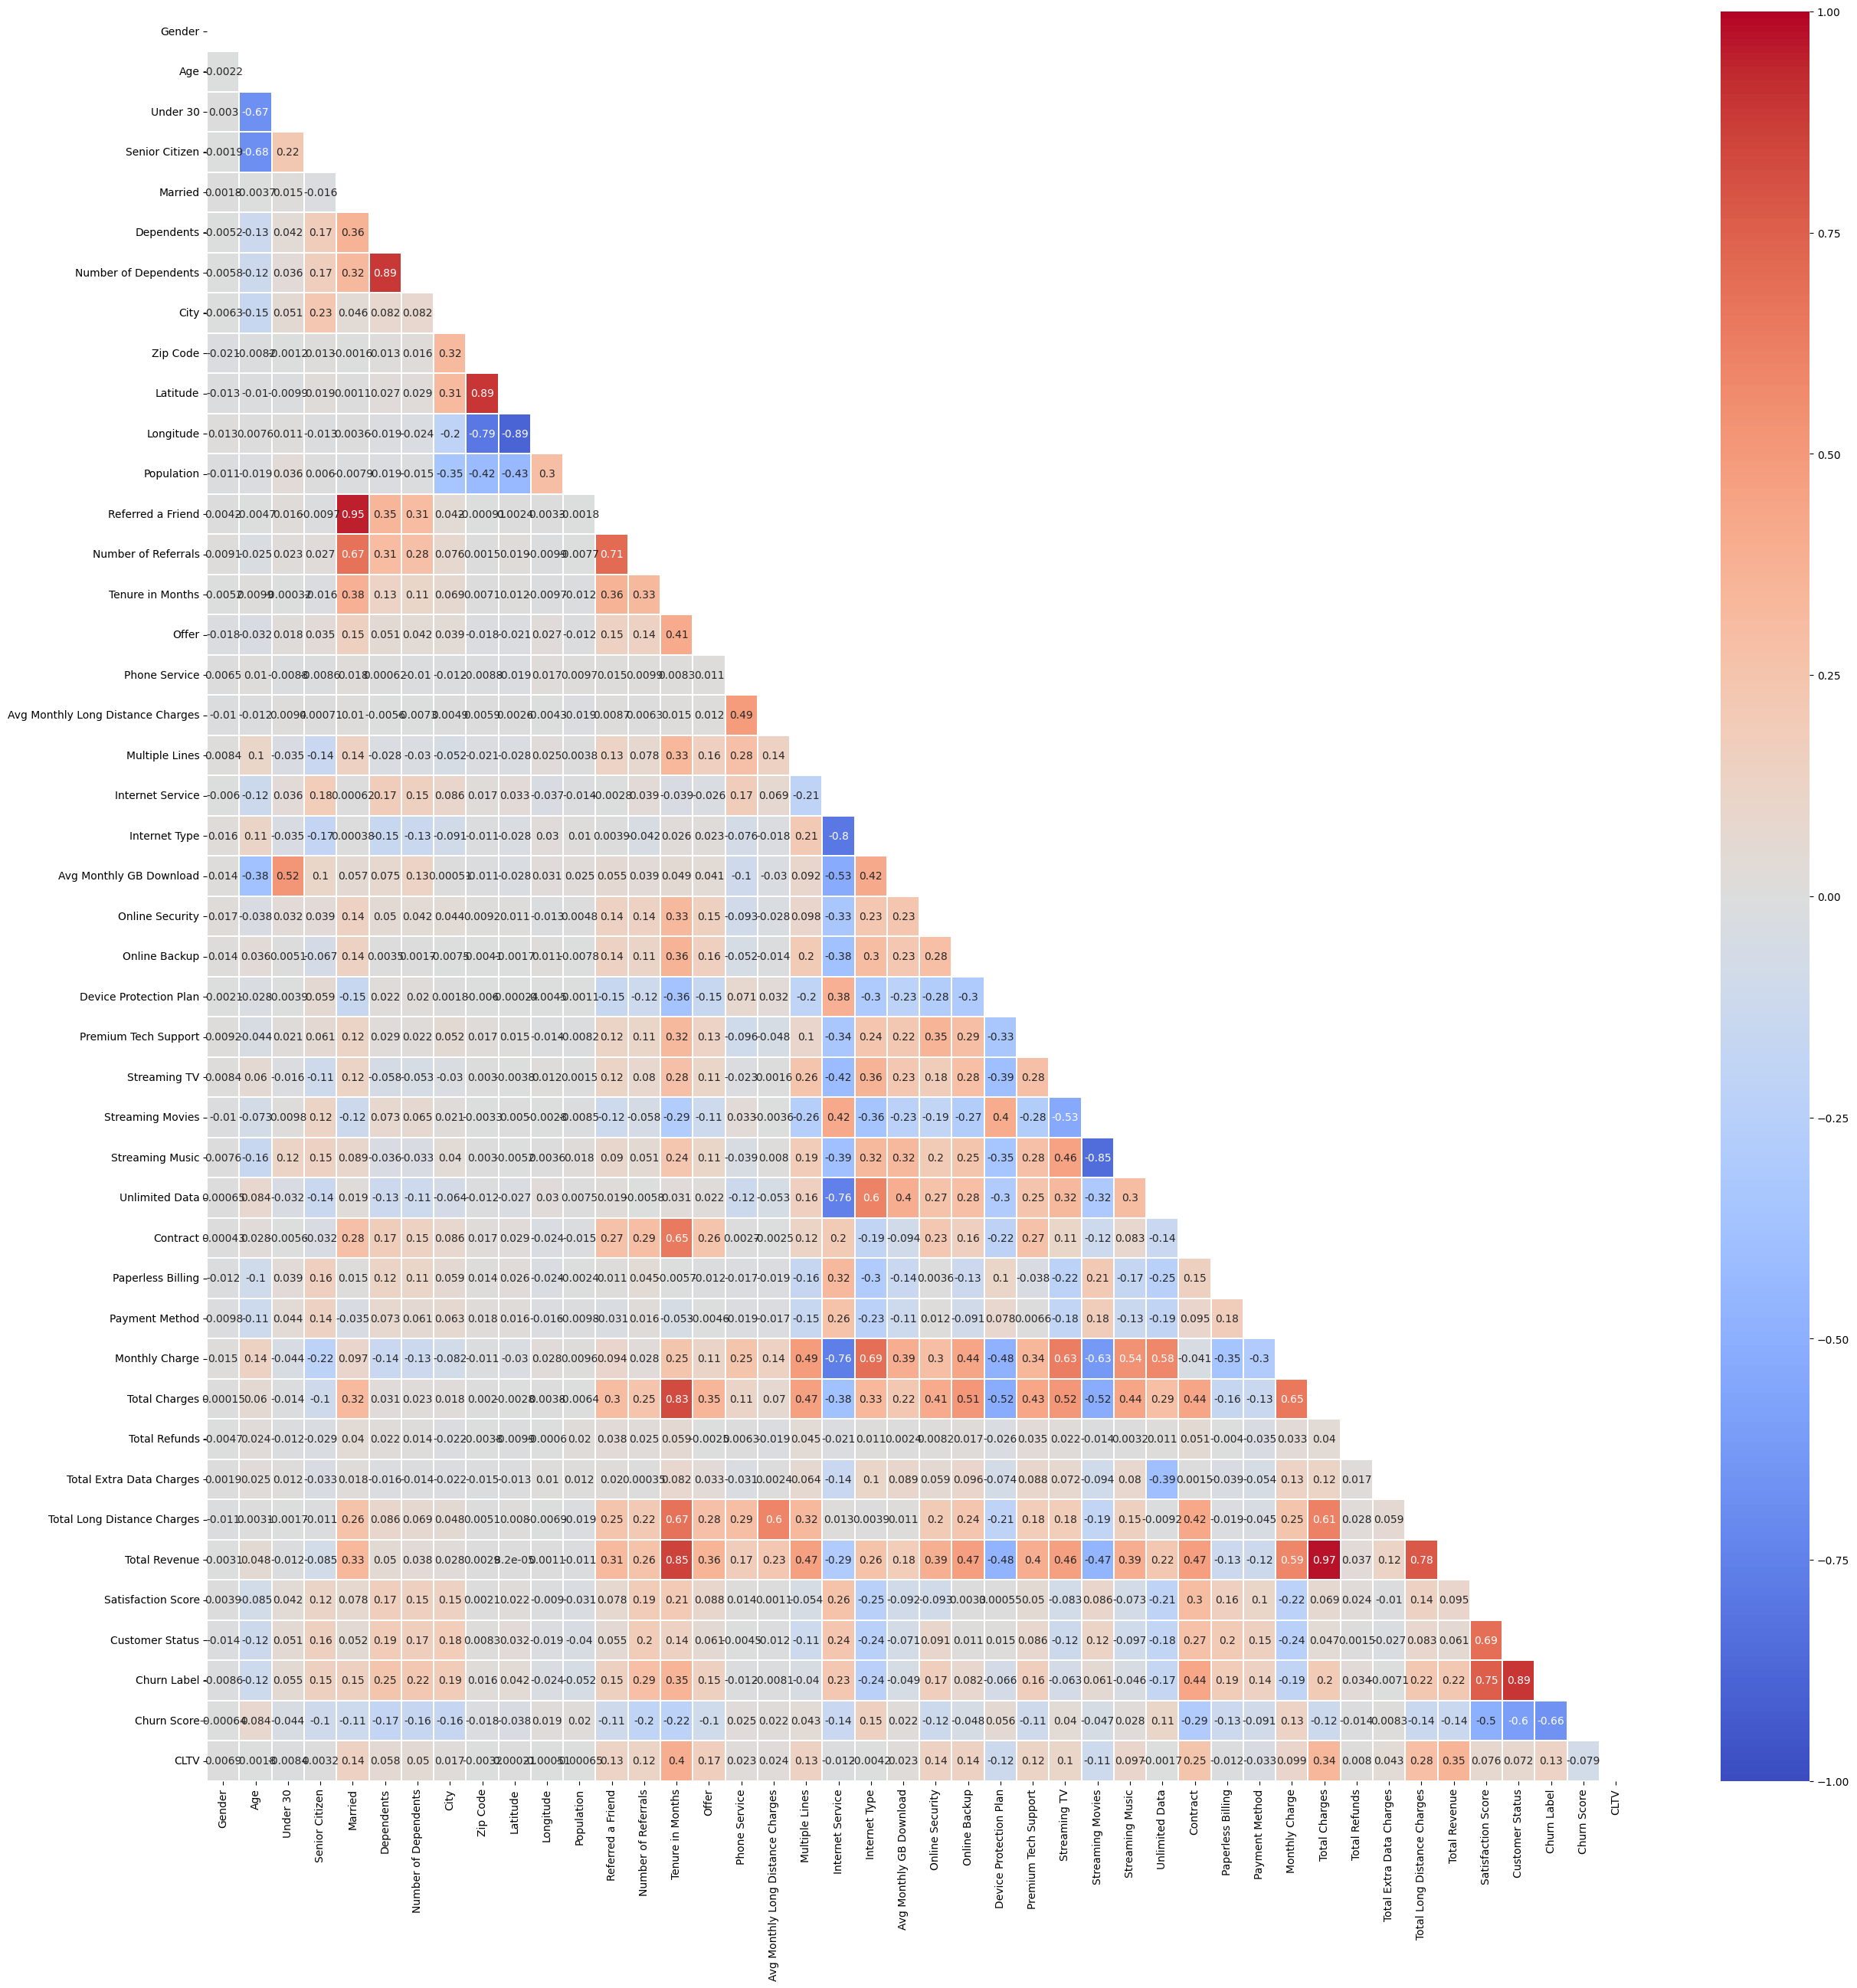

In [ ]:
new_df = df.copy()
new_df.drop(['Customer ID','Quarter','Country','State','Churn Category','Churn Reason'], axis=1, inplace=True)
categorical_cols = new_df.select_dtypes(include=['object']).columns

# Factoriser les colonnes catégoriques et les remplacer dans le DataFrame
for col in categorical_cols:
    new_df[col] = pd.factorize(new_df[col])[0]

plt.figure(figsize=(30, 30))
corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

##**Feature Insights on Churn:**

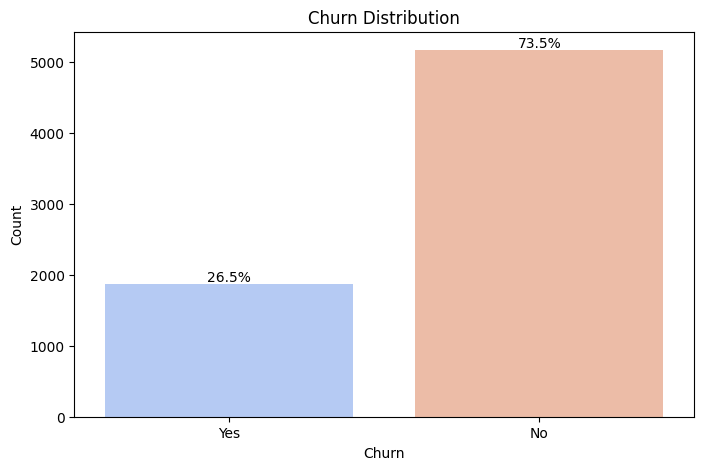

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn Label', data=df, palette='coolwarm')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

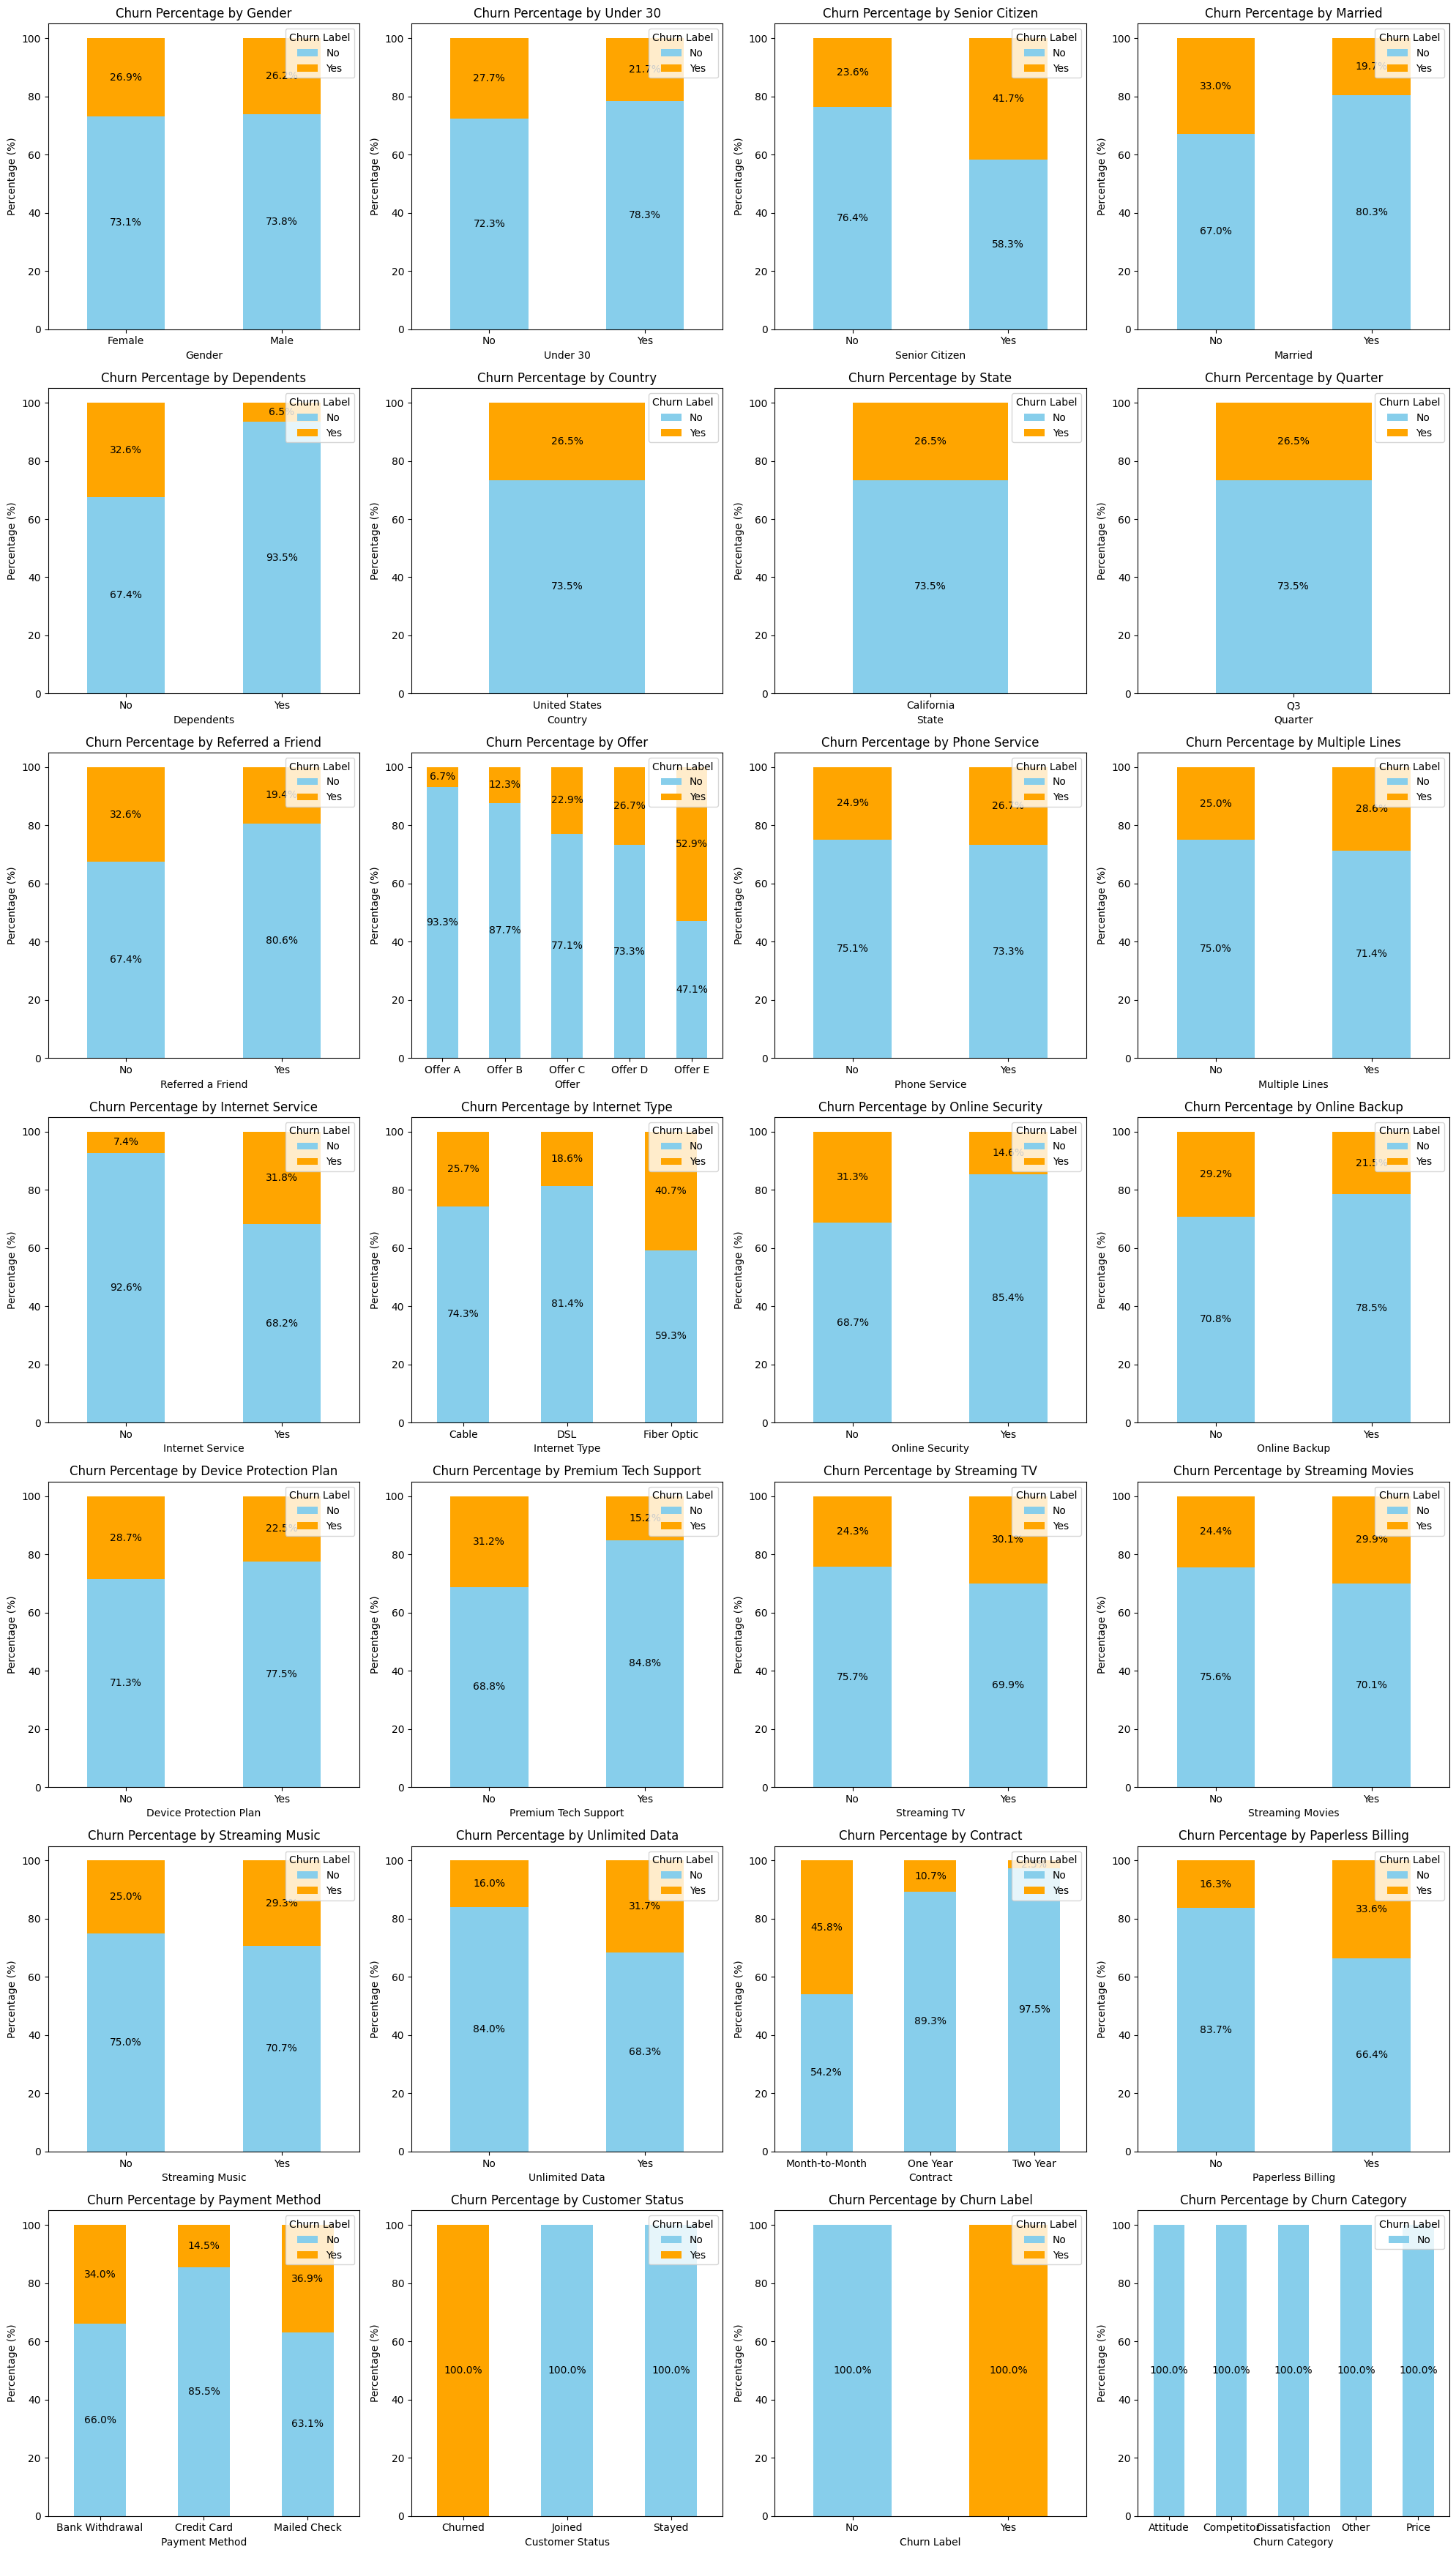

In [ ]:
colors = ['skyblue', 'orange']

num_columns = 4
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Analyse pour chaque variable
for i, variable in enumerate(categorical_columns):
    # Calculer le pourcentage de churn pour chaque catégorie
    churn_data = df.groupby([variable, 'Churn Label']).size().unstack(fill_value=0)
    churn_percentage = churn_data.div(churn_data.sum(axis=1), axis=0) * 100

    # Créer le graphique à barres
    churn_percentage.plot(kind='bar', stacked=True, ax=axes[i], color=colors)

    # Annoter chaque barre avec le pourcentage
    for j in range(len(churn_percentage)):
        cumulative_height = 0  # Pour le cumul
        for k in range(len(churn_percentage.columns)):
            height = churn_percentage.iloc[j, k]
            cumulative_height += height  # Suivre la hauteur cumulée pour les barres empilées

            if height > 0:  # Éviter les annotations pour les barres avec hauteur 0
                axes[i].annotate(f'{height:.1f}%',
                                  (j, cumulative_height - height / 2),  # Ajuster la position y pour l'annotation
                                  ha='center', va='center',
                                  fontsize=10, color='black')

    axes[i].set_title(f'Churn Percentage by {variable}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xticklabels(churn_percentage.index, rotation=0)
    axes[i].legend(title='Churn Label', labels=['No', 'Yes'], loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

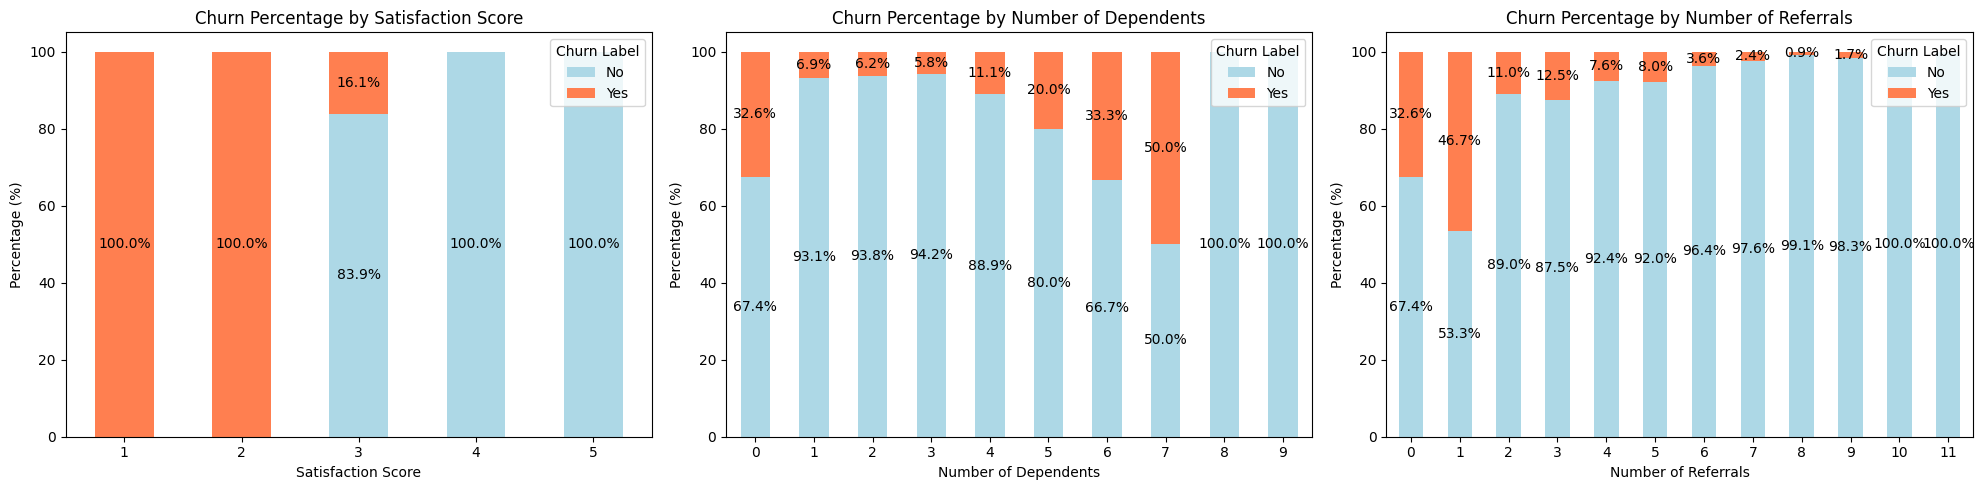

In [ ]:
features_to_plot = ['Satisfaction Score', 'Number of Dependents', 'Number of Referrals']
num_cols = 3
num_rows = (len(features_to_plot) + num_cols - 1) // num_cols  # Ajuster pour 3 colonnes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Aplatir le tableau d'axes pour un accès facile
axs = axs.flatten()

# Définir les couleurs pour chaque catégorie de churn
colors = {'Yes': 'coral', 'No': 'lightblue'}

# Tracer le pourcentage de churn par caractéristique
for i, feature in enumerate(features_to_plot):
    # Calculer le pourcentage de churn
    churn_data = df.groupby([feature, 'Churn Label']).size().unstack(fill_value=0)
    churn_percentage = churn_data.div(churn_data.sum(axis=1), axis=0) * 100

    # Créer le graphique
    churn_percentage.plot(kind='bar', stacked=True, color=[colors['No'], colors['Yes']], ax=axs[i])

    # Annoter chaque barre avec le pourcentage
    for j in range(len(churn_percentage)):
        cumulative_height = 0  # Pour empiler
        for k in range(len(churn_percentage.columns)):
            height = churn_percentage.iloc[j, k]
            cumulative_height += height  # Suivre la hauteur cumulative pour les barres empilées

            if height > 0:  # Éviter les annotations pour les barres de hauteur 0
                axs[i].annotate(f'{height:.1f}%',
                                (j, cumulative_height - height / 2),  # Ajuster la position y pour l'annotation
                                ha='center', va='center',
                                fontsize=10, color='black')

    # Paramétrer le graphique
    axs[i].set_title(f'Churn Percentage by {feature}')
    axs[i].set_ylabel('Percentage (%)')
    axs[i].set_xlabel(feature)
    axs[i].set_xticklabels(churn_percentage.index, rotation=0)
    axs[i].legend(title='Churn Label', loc='upper right')

# Supprimer le dernier axe s'il y a un nombre impair de caractéristiques
for j in range(len(features_to_plot), num_rows * num_cols):
    axs[j].axis('off')

# Ajuster l'affichage
plt.tight_layout()
plt.show()

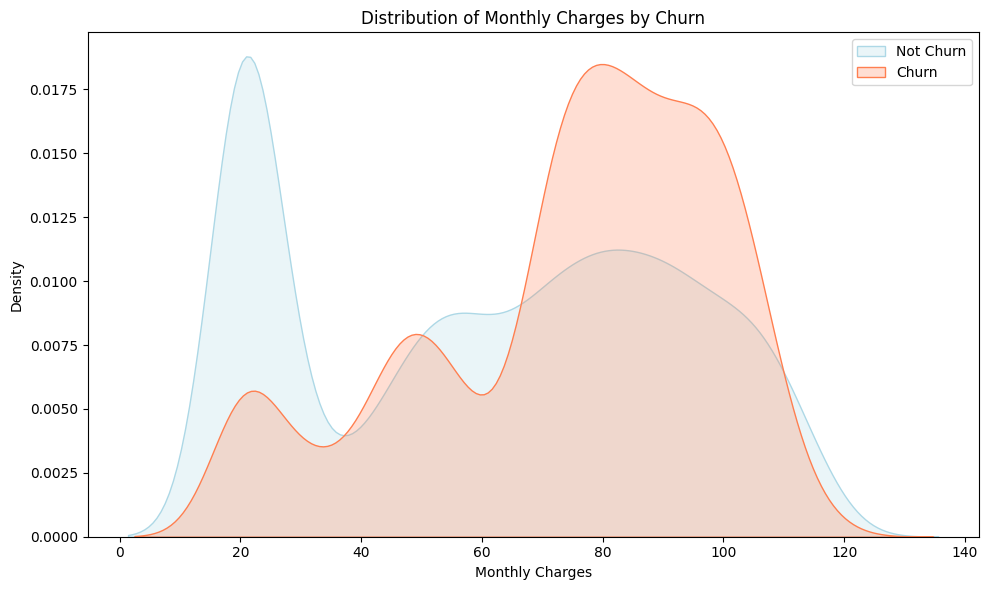

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'No'],
                 color="lightblue", shade=True)
ax = sns.kdeplot(df['Monthly Charge'][df["Churn Label"] == 'Yes'],
                 ax=ax, color="coral", shade=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')

ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.tight_layout()
plt.show()

In [ ]:
df_map = pd.merge(
    left=pd.merge(
        left=df[['Zip Code', 'City', 'Population', 'Longitude', 'Latitude']].drop_duplicates(),
        right=df.groupby(by='Zip Code', as_index=False)['Churn Label'].count().rename(columns={'Churn Label': 'Churn'}).drop_duplicates(),
        on='Zip Code',
        how='outer'
    ),
    right=df[df['Churn Label'] == 'No'].groupby(by='Zip Code', as_index=False)['Churn Label'].count().rename(columns={'Churn Label': 'Not Churn'}),
    on='Zip Code',
    how='outer'
).fillna(0)

# Calculer le taux de churn par ville
df_map['Churn Rate'] = df_map['Churn'] / (df_map['Churn'] + df_map['Not Churn']) * 100

# Trouver la ville avec le churn maximum
max_churn_city = df_map['Churn Rate'].max()
high_churn_cities = df_map[df_map['Churn Rate'] == max_churn_city]['City'].tolist()

# Créer une carte de densité
fig = px.density_mapbox(df_map, lat='Latitude', lon='Longitude', z='Churn',
                        radius=8,
                        zoom=4.4,
                        color_continuous_scale='rainbow',
                        mapbox_style='open-street-map'
                        )

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=0, r=0, b=0, t=0, pad=0),
    plot_bgcolor='white'
)
fig.show()

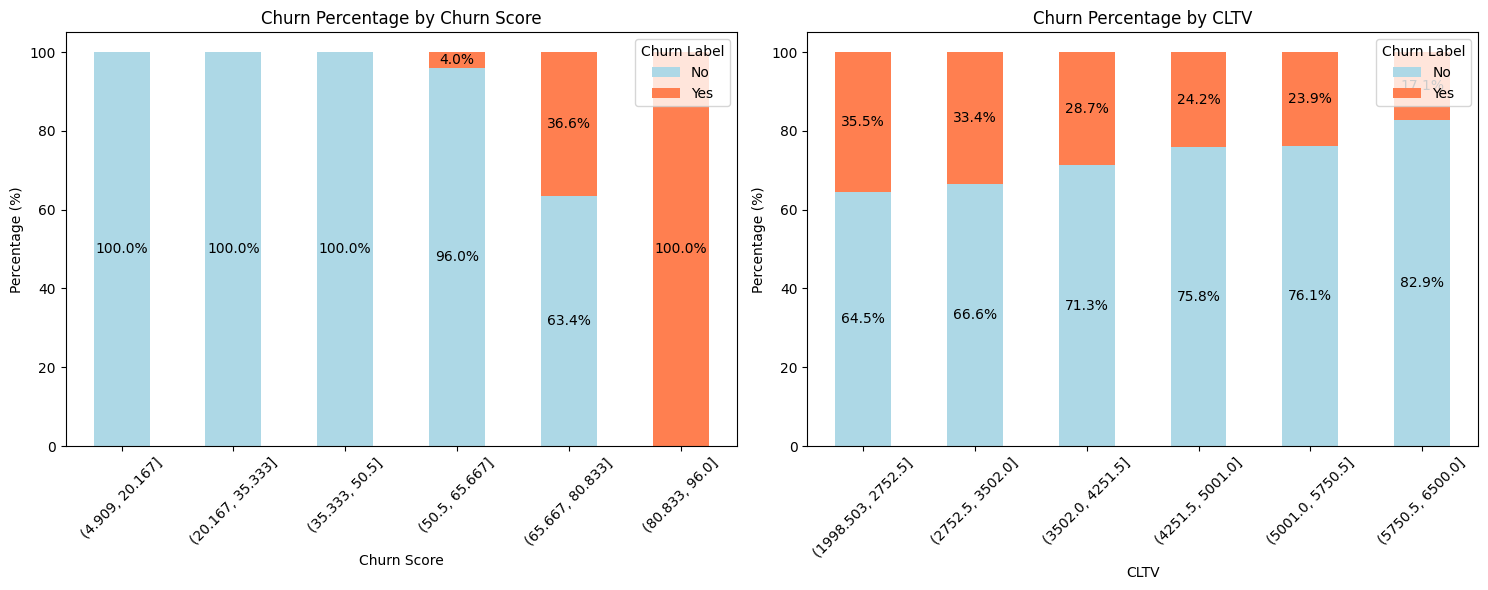

In [ ]:
features_to_plot_ = ['Churn Score', 'CLTV']

bins_dict = {'Churn Score': 6, 'CLTV': 6}
num_cols = 2
num_rows = (len(features_to_plot_) + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
axs = axs.flatten()
colors = {'Yes': 'coral', 'No': 'lightblue'}

df_test=df.copy()

for i, feature in enumerate(features_to_plot_):
    df_test[f'{feature}_binned'] = pd.cut(df_test[feature], bins=bins_dict[feature])
    churn_data = df_test.groupby([f'{feature}_binned', 'Churn Label']).size().unstack(fill_value=0)
    churn_percentage = churn_data.div(churn_data.sum(axis=1), axis=0) * 100
    churn_percentage.plot(kind='bar', stacked=True, color=[colors['No'], colors['Yes']], ax=axs[i])

    for j in range(len(churn_percentage)):
        cumulative_height = 0  # Pour empiler
        for k in range(len(churn_percentage.columns)):
            height = churn_percentage.iloc[j, k]
            cumulative_height += height

            if height > 0:
                axs[i].annotate(f'{height:.1f}%',
                                (j, cumulative_height - height / 2),
                                ha='center', va='center',
                                fontsize=10, color='black')

    axs[i].set_title(f'Churn Percentage by {feature}')
    axs[i].set_ylabel('Percentage (%)')
    axs[i].set_xlabel(feature)
    axs[i].set_xticklabels([str(bin) for bin in churn_percentage.index], rotation=45)
    axs[i].legend(title='Churn Label', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns=numerical_columns.drop(['Zip Code', 'Population', 'Longitude', 'Latitude','Churn Score'])
numerical_columns=numerical_columns.drop(features_to_plot)

numerical_columns

Index(['Age', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
       'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'CLTV'],
      dtype='object')

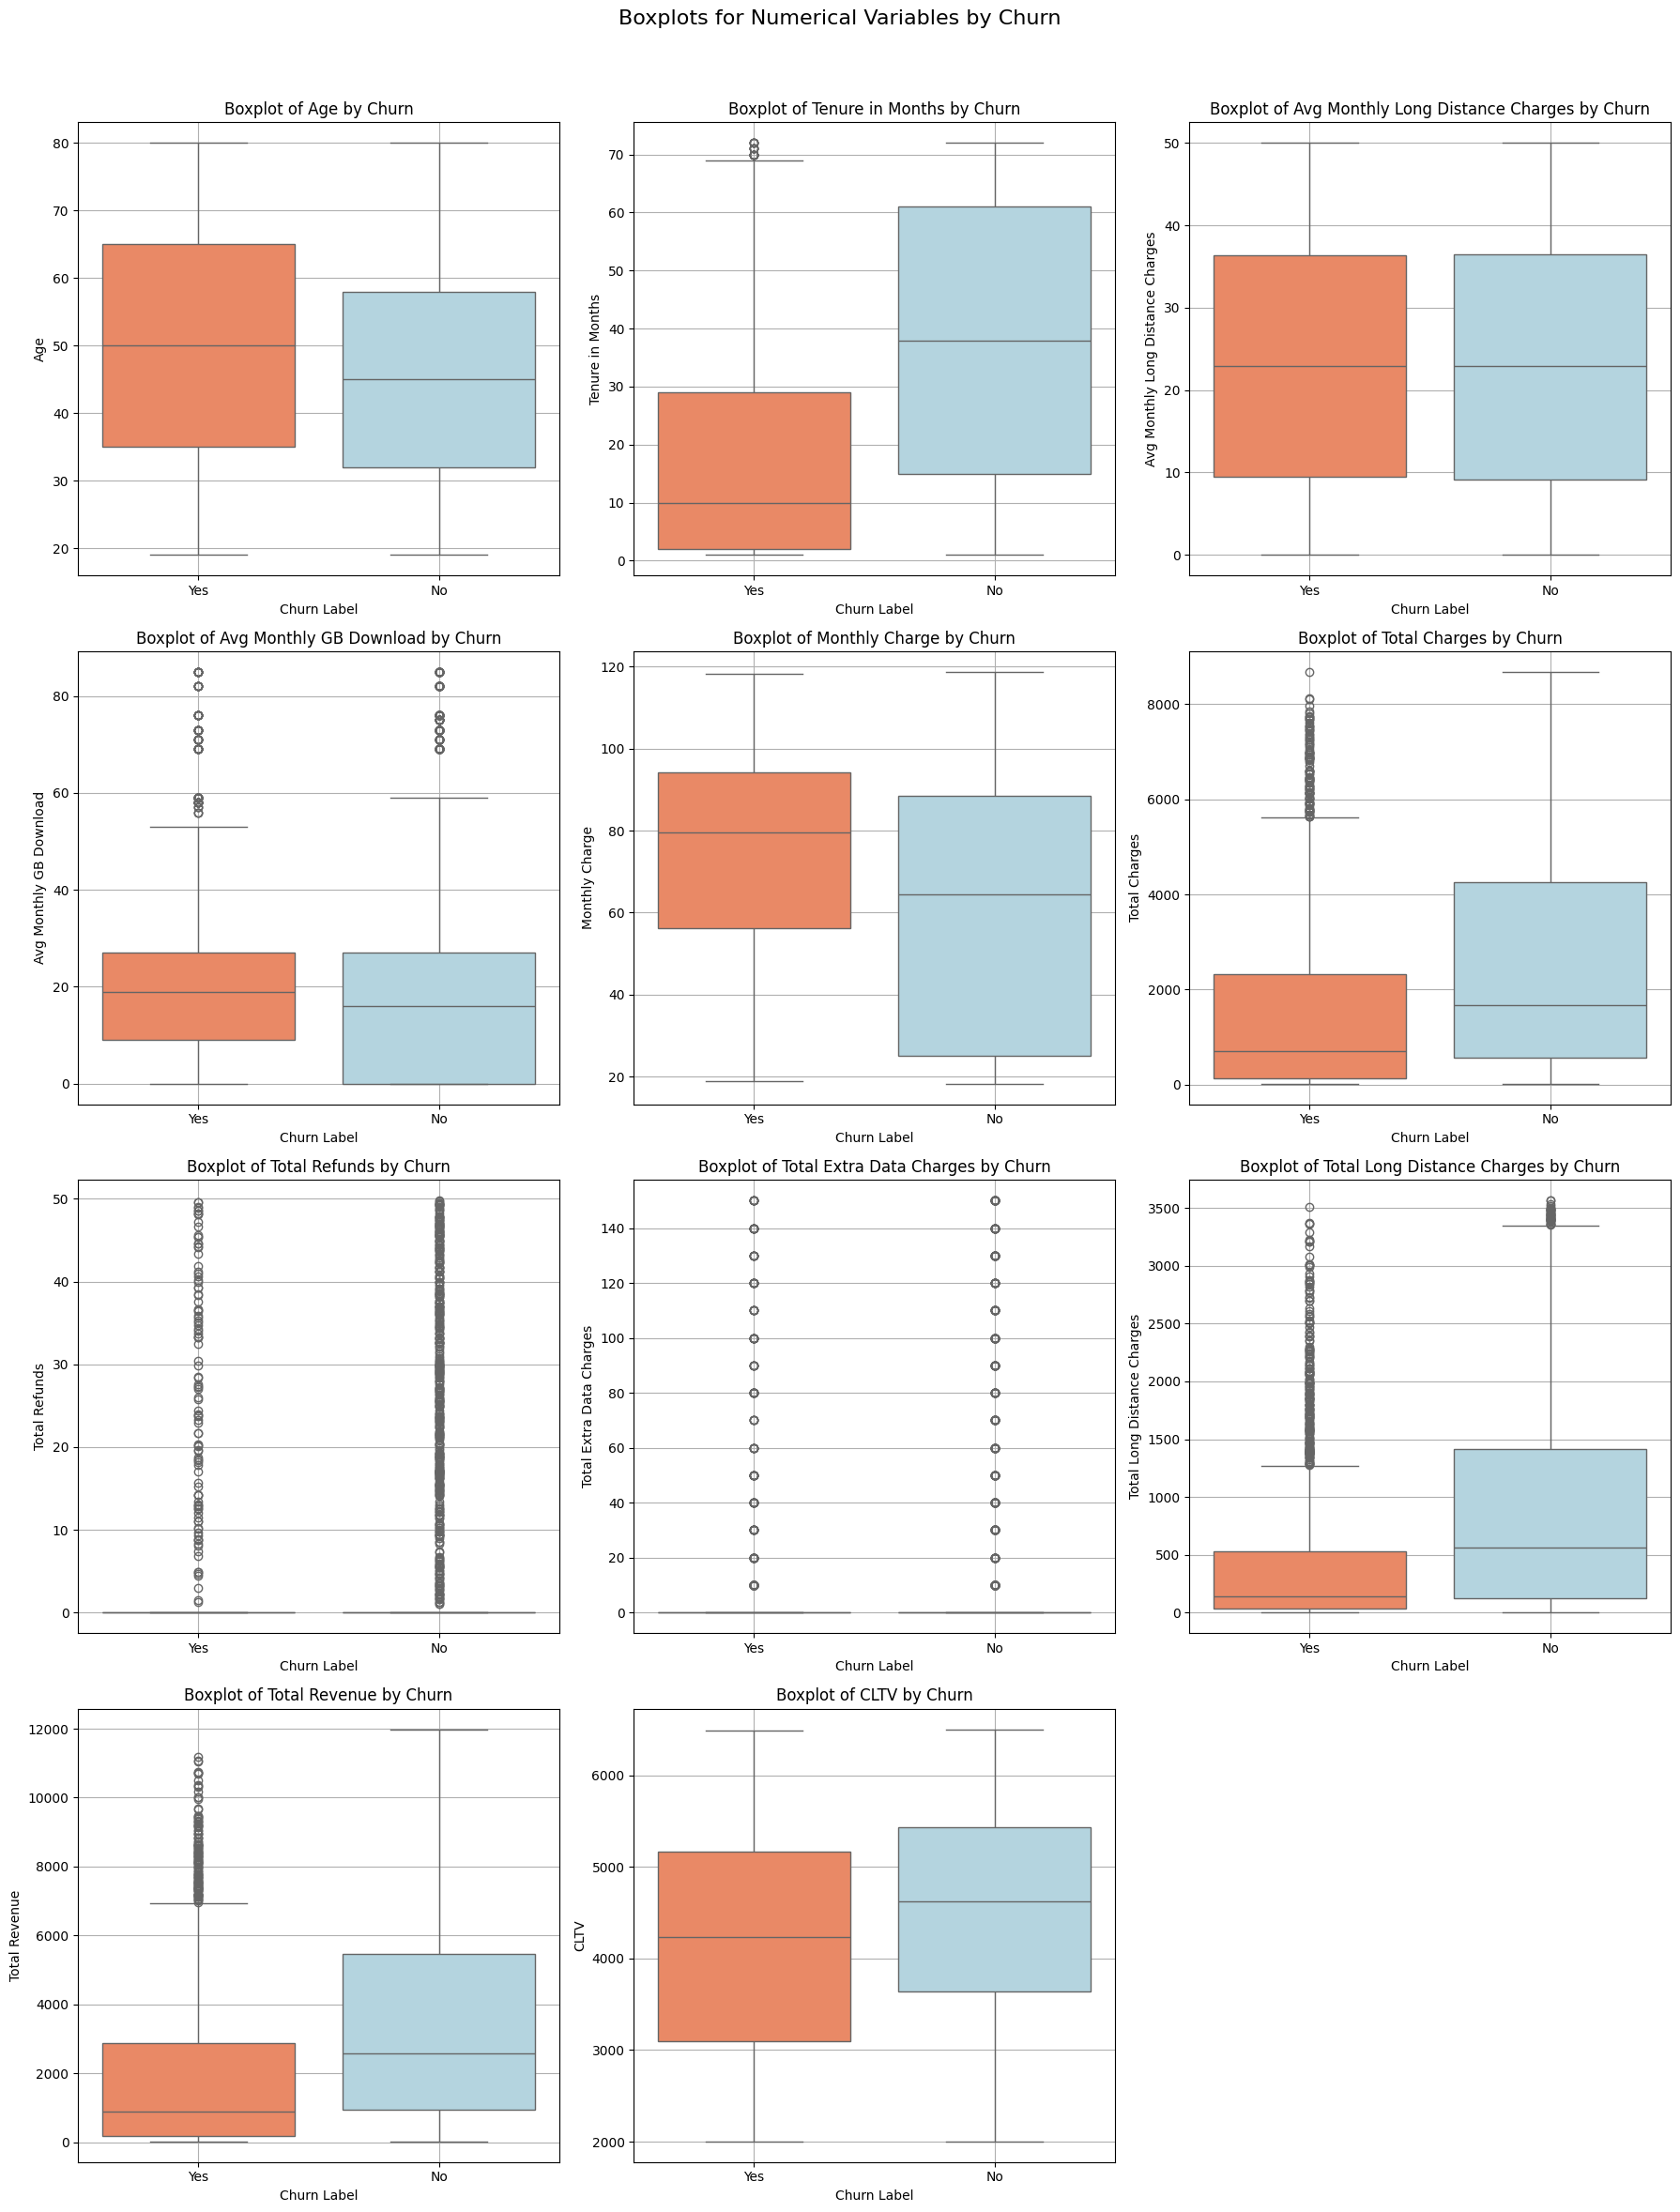

In [ ]:
num_vars = len(numerical_columns)
rows = (num_vars + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(18, 6*rows))
fig.suptitle('Boxplots for Numerical Variables by Churn', fontsize=16)

axes = axes.flatten()
for idx, variable in enumerate(numerical_columns):
    sns.boxplot(ax=axes[idx], data=df, x='Churn Label', y=variable, palette=['coral', 'lightblue'])

    axes[idx].set_title(f'Boxplot of {variable} by Churn')
    axes[idx].set_xlabel('Churn Label')
    axes[idx].set_ylabel(variable)
    axes[idx].grid(True)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **Conclusion :**

Based on the exploratory data analysis, several conclusions can be drawn regarding feature selection for the churn prediction model:

* The following features will be removed due to their irrelevance or redundancy for predictive purposes: **Customer ID, Gender, Age, Zip Code, Latitude, Longitude, City, Churn Category, Churn Reason, and Customer Status**.
* **Offer , Churn Score and Satisfaction Score** have been identified as key predictors for churn and will be retained for model training.
* Certain variables, such as **Total Charges and Total Revenue**, show high correlation with each other. To avoid multicollinearity, we will keep only one of these variables.
* Additionally, there are other variables that appear to be less important based on initial analysis. Their relevance will be confirmed or rejected during the feature extraction phase.

These preliminary findings will be further validated using automated feature selection methods to ensure optimal performance of the predictive model.